In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
low_memory=False

In [2]:
single = pd.read_csv(r'c:\Users\thoma\PycharmProjects\UKCompData\WCA Database\WCA_export_RanksSingle.tsv', delimiter='\t')
average = pd.read_csv(r'c:\Users\thoma\PycharmProjects\UKCompData\WCA Database\WCA_export_RanksAverage.tsv', delimiter='\t')
persons = pd.read_csv(r'c:\Users\thoma\PycharmProjects\UKCompData\WCA Database\WCA_export_Persons.tsv', delimiter='\t')

c:\users\thoma\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
persons = persons.drop(['subid', 'countryId'], axis=1)

In [4]:
men = persons[persons.gender == 'm'].drop(['gender'], axis=1).reset_index(drop='index')
women = persons[persons.gender == 'f'].drop(['gender'], axis=1).reset_index(drop='index')

In [5]:
single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510287 entries, 0 to 510286
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   personId       510287 non-null  object
 1   eventId        510287 non-null  object
 2   best           510287 non-null  int64 
 3   worldRank      510287 non-null  int64 
 4   continentRank  510287 non-null  int64 
 5   countryRank    510287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 19.5+ MB


In [6]:
single['eventId'] = single['eventId'].apply(lambda x: str(x))
single['best'] = single['best'].apply(lambda x: x/100)
average['eventId'] = average['eventId'].apply(lambda x: str(x))
average['best'] = average['best'].apply(lambda x: x/100)

In [7]:
single_333 = single[single.eventId == '333']
average_333 = average[average.eventId == '333']

In [8]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15317 entries, 0 to 15316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15317 non-null  object
 1   name    15317 non-null  object
dtypes: object(2)
memory usage: 119.7+ KB


In [9]:
col_s = list(single.columns)
col_a = list(average.columns)

In [10]:
women_id = []
women_name = []
women_s = []
women_a = []
count_w = 0
l = len(women.id)
x = datetime.now()
for i in range(l):
    wcaid = women.id[i]
    name = women.name[i]
    df = single_333[single_333.personId == wcaid].reset_index(drop='index')
    dg = average_333[average_333.personId == wcaid].reset_index(drop='index')
    if len(df.best) != 0 and df.best[0] < 60:
        women_id.append(wcaid)
        women_name.append(name)
        women_s.append(df.best[0])
        if len(dg.best) == 0:
            women_a.append(3600)
        else:
            women_a.append(dg.best[0])
    count_w += 1
    if count_w % 500 == 0:
        print('%complete: '+str(round(100*count_w/l))+'% '+ str(datetime.now()-x))
        x = datetime.now()
    
    
women_333 = pd.DataFrame({'Id':women_id, 'name':women_name, 'single':women_s, 'average':women_a})
women_333 = women_333.sort_values('single').reset_index(drop='index')

%complete: 3% 0:00:20.055858
%complete: 7% 0:00:15.414788
%complete: 10% 0:00:14.247682
%complete: 13% 0:00:14.338926
%complete: 16% 0:00:13.980655
%complete: 20% 0:00:15.369974
%complete: 23% 0:00:17.513134
%complete: 26% 0:00:18.507576
%complete: 29% 0:00:16.538781
%complete: 33% 0:00:18.808064
%complete: 36% 0:00:18.949340
%complete: 39% 0:00:18.941906
%complete: 42% 0:00:19.605855
%complete: 46% 0:00:19.903954
%complete: 49% 0:00:21.070113
%complete: 52% 0:00:17.601422
%complete: 55% 0:00:17.647069
%complete: 59% 0:00:16.582091
%complete: 62% 0:00:15.845959
%complete: 65% 0:00:19.559240
%complete: 69% 0:00:19.396684
%complete: 72% 0:00:17.386718
%complete: 75% 0:00:17.898335
%complete: 78% 0:00:16.661142
%complete: 82% 0:00:18.568521
%complete: 85% 0:00:19.365683
%complete: 88% 0:00:17.772362
%complete: 91% 0:00:19.035949
%complete: 95% 0:00:19.103083
%complete: 98% 0:00:18.924474


In [23]:
times = np.arange(0, 61, 1)
mws = [np.mean(women_333[women_333.single < t].single) for t in times]
ovs = [np.mean(single_333[single_333.best < t].best) for t in times]
mwa = [np.mean(women_333[women_333.average < t].average) for t in times]
ova = [np.mean(average_333[average_333.best < t].best) for t in times]

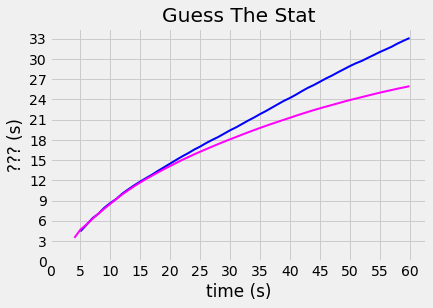

In [25]:
plt.style.use('fivethirtyeight')
plt.plot(mws, color='blue', linewidth=2)
plt.plot(ovs, color='magenta', linewidth=2)
plt.xlabel("time (s)")
plt.ylabel("??? (s)")
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 36, 3))
plt.title('Guess The Stat')
plt.show()

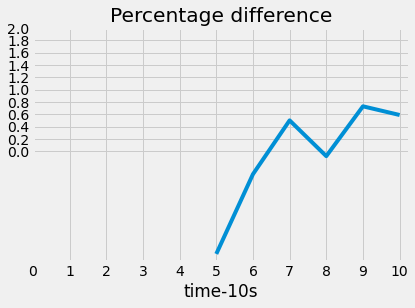

In [26]:
single_difference = [100*(mws[i]-ovs[i])/(i+10) for i in range(11)]
plt.plot(single_difference)
plt.title('Percentage difference')
plt.xlabel('time-10s')
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0,2.2,0.2))
plt.show()

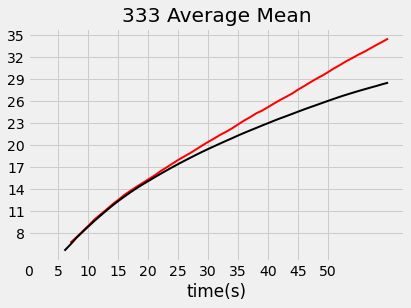

In [28]:
plt.style.use('fivethirtyeight')
plt.plot(mwa, color='red', linewidth=2)
plt.plot(ova, color='black', linewidth=2)
plt.xlabel('time(s)')
plt.xticks(np.arange(0, 51, 5))
plt.yticks(np.arange(8, 36, 3))
plt.title('333 Average Mean')
plt.show()

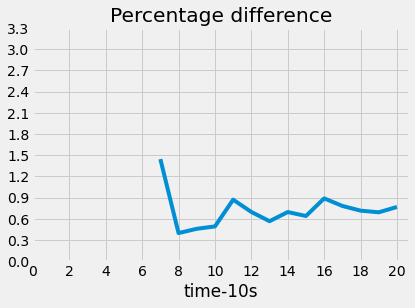

In [27]:
average_difference = [100*(mwa[i]-ova[i])/(i+10) for i in range(21)]
plt.plot(average_difference)
plt.title('Percentage difference')
plt.xlabel('time-10s')
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0,3.5,0.3))
plt.show()